#Singular Value Decomposition (SVD) on book reviews data

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

In [2]:
df = pd.read_csv('data/book_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,User-ID,ISBN,Book-Rating
0,1083,277195,0060391626,10
1,1084,277195,0060502258,0
2,1089,277195,0060987561,0
3,1098,277195,0316666343,0
4,1099,277195,0316734837,0


In [4]:
dfPivot = df.pivot('User-ID', 'ISBN')['Book-Rating']

In [5]:
dfData = dfPivot.fillna(-1)

In [6]:
dfData.head()

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
254,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
507,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
638,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
805,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
dfData.values

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [8]:
U, s, V = svd(dfData.values, full_matrices = True)

In [9]:
print U.shape, s.shape, V.shape

(2500, 2500) (2500,) (6092, 6092)


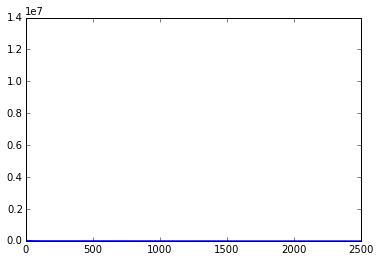

In [14]:
plt.plot(np.square(s))

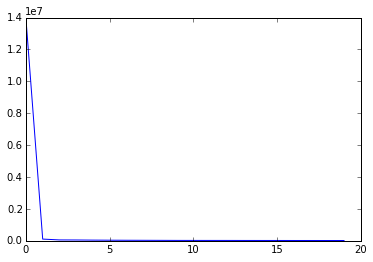

In [15]:
plt.plot(np.square(s)[:20])

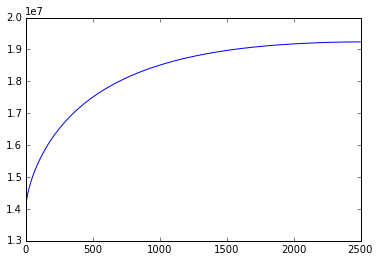

In [17]:
cumulative = np.cumsum(s ** 2)
plt.plot(cumulative)

In [18]:
total_energy = np.sum(s ** 2)
total_energy * .9

17314294.500000067

In [21]:
total = cumulative

In [23]:
for i in xrange(len(total)):
    if total[i] > 17314294.500000067:
        print i-1
        break

440


In [24]:
dfMeta = pd.read_csv('data/book_meta.csv', error_bad_lines=False, sep=';')

Skipping line 227933: expected 10 fields, saw 11

/Users/Warren/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [25]:
concepts = V[0:10] #keeping 10 topics

In [26]:
dfMeta.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,two,three
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN


In [27]:
books = dfMeta

In [28]:
books = books.set_index('ISBN')

In [31]:
pv = dfData

In [32]:
def print_titles(topic, n):
    indx = np.argsort(topic)
    rv_indx = indx[::-1]
    for idx in pv.columns[rv_indx[:n]]:
        try:
            print books.loc[idx]['Book-Title'] + " : " + books.loc[idx]['Book-Author']
        except Exception:
            continue

####Topic related to each concept

In [33]:
for i in range(len(concepts)):
    print "Topic #%d :" % i
    print "\n"
    print_titles(concepts[i], 10)
    print "\n"

Topic #0 :


Name Der Rose : Umberto Eco
Monsieur Ibrahim und die Blumen des Koran. Erz�?¤hlung. : Eric-Emmanuel Schmitt
Artemis Fowl. : Eoin Colfer
Novocento, Un Monologo : Alessandro Baricco
Schlafes Bruder : Robert Schneider
New Vegetarian: Bold and Beautiful Recipes for Every Occasion : Celia Brooks Brown
Der Alchimist. : Paulo Coelho
Die Weiss Lowin / Contemporary German Lit : Henning Mankell
Crazy : Benjamin Lebert
Free : Paul Vincent


Topic #1 :


The Red Tent (Bestselling Backlist) : Anita Diamant
The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
Two for the Dough : Janet Evanovich
Snow Falling on Cedars : David Guterson
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
1st to Die: A Novel : James Patterson
Good in Bed : Jennifer Weiner
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson : MITCH ALBOM


Topic #2 :


Dance upon the Air (Thr

In [36]:
# how much the user likes each concept
U[:,:10][0]

array([-0.02033966,  0.00327259, -0.0055954 ,  0.00288085, -0.0019582 ,
        0.00617848, -0.01451267,  0.00338496, -0.00870693,  0.00158482])

In [39]:
# user likes topic 5, these are the titles that are under that concept/topic 
print_titles(V[:10,:][5], 15)

The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
To the Nines: A Stephanie Plum Novel : Janet Evanovich
The Five People You Meet in Heaven : Mitch Albom
1st to Die: A Novel : James Patterson
The Last Juror : John Grisham
2nd Chance : James Patterson
Four Blind Mice : James Patterson
No Second  Chance : Harlan Coben
Full House (Janet Evanovich's Full Series) : Janet Evanovich
Seven Up (A Stephanie Plum Novel) : Janet Evanovich
The Lake House : James Patterson
Blow Fly: A Scarpetta Novel : Patricia Cornwell
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) : Janet Evanovich
From a Buick 8 : A Novel : Stephen King


##Movies data

In [41]:
reviews = pd.read_table('data/u.data', sep='\t', names =  ['user', 'movie', 'rating', 'timestamp'])

In [42]:
reviews.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [43]:
features = reviews.pivot(index='user', columns='movie', values='rating').fillna(-1)

In [44]:
U, Sigma, VT = np.linalg.svd(features.as_matrix())

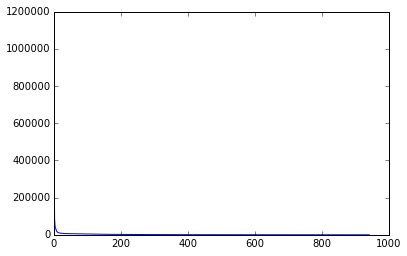

In [45]:
plt.plot(Sigma ** 2)

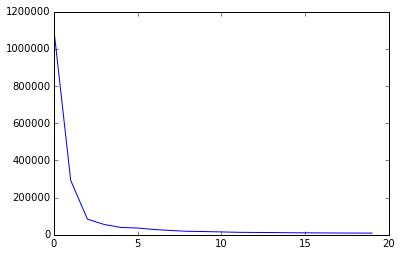

In [46]:
plt.plot((Sigma ** 2)[:20])

In [47]:
# keep 10 topics
V_10 = VT[:10,:]

In [48]:
U_10 = U[:,:10]

In [49]:
movies = pd.read_table('data/u.item', sep='|', names =['movie_id', 'title', 'release', 'video_release', 'imdb', 'unknown','Action','Adventure','Animation', 'Children', 'Comedy' ,'Crime' ,'Documentary' ,'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])

In [50]:
len(movies)

1682

In [51]:
movies.loc[5]

movie_id                                                         6
title            Shanghai Triad (Yao a yao yao dao waipo qiao) ...
release                                                01-Jan-1995
video_release                                                  NaN
imdb             http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
unknown                                                          0
Action                                                           0
Adventure                                                        0
Animation                                                        0
Children                                                         0
Comedy                                                           0
Crime                                                            0
Documentary                                                      0
Drama                                                            1
Fantasy                                                       

In [52]:
# indices of most prominent movies for topic 1
indx = np.argsort(V_10[1])
rv_indx = indx[::-1]

# 20 moives from topic 0
movies.loc[rv_indx[:20]]

,movie_id,title,release,video_release,imdb,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
689,690,Seven Years in Tibet (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Seven+Years+i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
331,332,Kiss the Girls (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kiss+the+Girl...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
681,682,I Know What You Did Last Summer (1997),17-Oct-1997,NaN,http://us.imdb.com/M/title-exact?I+Know+What+Y...,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
326,327,Cop Land (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Cop+Land+(1997),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,300,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
936,937,"Thousand Acres, A (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Thousand+Acre...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291,292,Rosewood (1997),21-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Rosewood%20(1...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879,880,Soul Food (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Soul+Food+(1997),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,344,"Apostle, The (1997)",18-Dec-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,938,"Smile Like Yours, A (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Smile+Like+Yo...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
def print_movies(topic, n):
    indx = np.argsort(topic)
    rv_indx = indx[::-1]
    
    print movies.loc[rv_indx[:n]]['title']

In [54]:
for i in range(len(V_10)):
    print "Topic #%d :" % i
    print "\n"
    print_movies(V_10[i], 15)
    print "\n"

Topic #0 :


1650                         Spanish Prisoner, The (1997)
1635                           Brothers in Trouble (1995)
1644                              Butcher Boy, The (1998)
1649                              Butcher Boy, The (1998)
1584                                American Dream (1990)
912                  Love and Death on Long Island (1997)
1629    Silence of the Palace, The (Saimt el Qusur) (1...
1631          Land and Freedom (Tierra y libertad) (1995)
1632                   � k�ldum klaka (Cold Fever) (1994)
1634                                  Two Friends (1986) 
1636                                    Girls Town (1996)
1639                               Eighth Day, The (1996)
1640                                      Dadetown (1995)
1646                                       Hana-bi (1997)
1648                                  Big One, The (1997)
Name: title, dtype: object


Topic #1 :


689               Seven Years in Tibet (1997)
331                     Kiss 

##Senate voting data

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
from sklearn.manifold import MDS
from statsmodels.iolib.foreign import genfromdta
import os
from scipy.spatial import distance
import re
import math

In [56]:
cong = {}

for file_n in os.listdir('data/senate'):
    senate = file_n.split('.')[0]
    cong[senate] = pd.read_csv('data/senate/' + file_n)

In [58]:
# check data for 101st senate votes
cong['s101'].head()

,Unnamed: 0,cong,id,state,dist,lstate,party,eh1,eh2,name,...,V629,V630,V631,V632,V633,V634,V635,V636,V637,V638
0,1,101,99908,99,0,USA,200,0,0,BUSH,...,9,9,9,9,9,9,9,9,9,1
1,2,101,14659,41,0,ALABAMA,100,0,1,"SHELBY, RIC",...,1,1,1,1,1,1,1,1,1,6
2,3,101,14705,41,0,ALABAMA,100,0,1,"HEFLIN, HOW",...,1,1,1,1,1,1,1,1,1,6
3,4,101,12109,81,0,ALASKA,200,0,1,"STEVENS, TH",...,1,1,1,1,6,6,1,1,1,1
4,5,101,14907,81,0,ALASKA,200,0,1,"MURKOWSKI,",...,1,1,1,1,6,6,1,1,1,6


In [59]:
# convert the mapping of numeric vote to Yay (1), Nay (-1), abstain (0)
mapping = {1:  1,
           2:  1,
           3:  1,
           4: -1,
           5: -1,
           6: -1,
           7:  0,
           8:  0,
           9:  0,
           0:  0}

def transformers(df):
    cols = [ c for c in df.columns if c[0].lower() == 'v']
    
    df[cols] = df[cols].applymap(lambda x: mapping[x])
    
for k in cong:
    transformers(cong[k])

In [60]:
roll = cong['s101']
cols = [ c for c in roll.columns if c[0].lower() == 'v'] 
dist = distance.pdist(roll[cols], metric='euclidean')
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

names = roll.name.values
dem = np.where(roll.party == 100)[0]
rep = np.where(roll.party == 200)[0]

def plot_senate(mds):
    plt.figure(figsize = (12, 10))

    plt.plot(mds[:, 0], mds[:, 1], '.', alpha = 0)

    plt.title('Senators of the 101th Congress')

    for i in dem:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'blue',
                     alpha = 0.3)

    for i in rep:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'red',
                     alpha = 0.5)

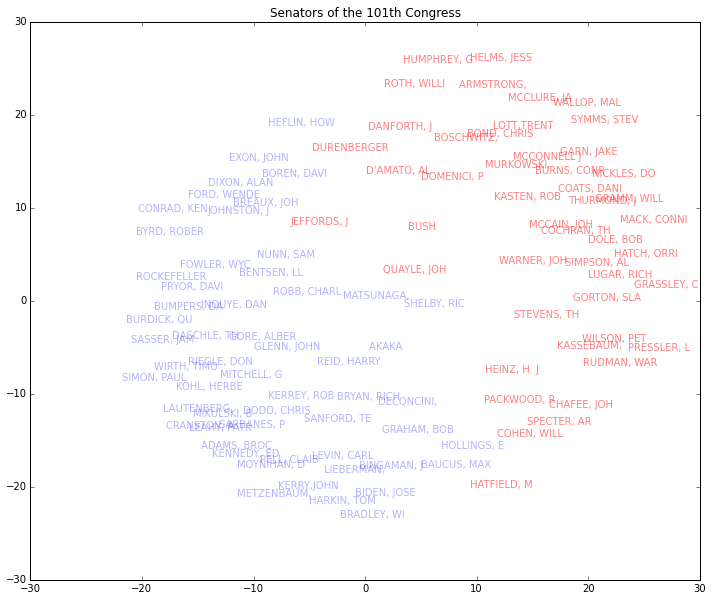

In [61]:
plot_senate(mds) #euclidean distance

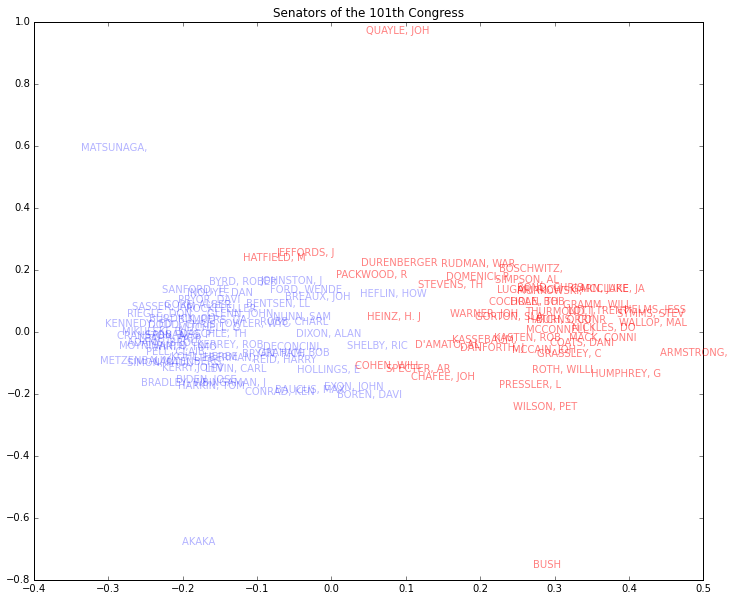

In [62]:
dist = distance.pdist(roll[cols], metric='jaccard') #jaccardian distance
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))
plot_senate(mds)

[None]

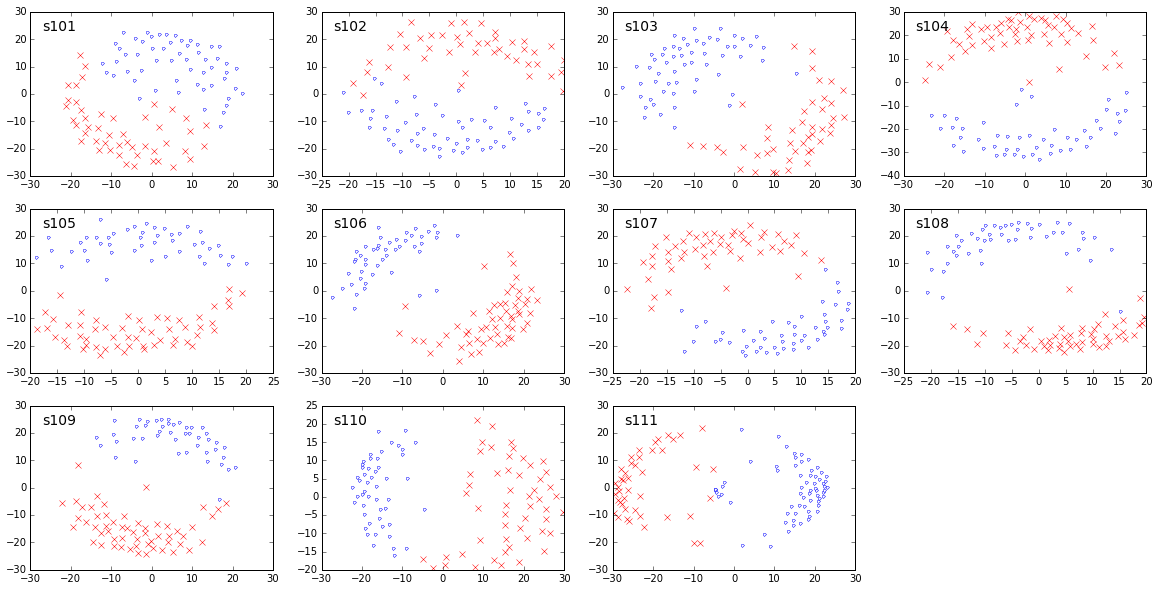

In [63]:
# euclidean distance of all years
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))
for a, cn in zip(ax.ravel(), sorted(cong.items(), key=lambda x: int(x[0][1:]))):
    sen = cn[1]
    cols = [ c for c in sen.columns if c[0].lower() == 'v'] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    a.plot(mds[dem, 0], mds[dem, 1], '.b', mfc = 'white')
    a.plot(mds[rep, 0], mds[rep, 1], 'xr')
  
    a.text(0.05, .95, cn[0], transform = a.transAxes, verticalalignment = 'top', fontsize = 14)
    
plt.setp(ax[2, 3], visible = False) 

In [64]:
import plotly
import plotly.plotly as py
import plotly.tools as tls 
from plotly.graph_objs import *

py.sign_in('wlau88', '7ql4pvy5w4')
py.iplot_mpl(fig)

In [65]:
fig = tls.get_subplots(
    rows= 4,            # number of rows
    columns= 4,         # number of columns
    horizontal_spacing= 0.02,  # horiz. spacing (norm. coord)
    vertical_spacing= 0.02,    # vert. spacing (norm. coord)
    print_grid=True            # print axis grid ids to screen
)

This is the format of your plot grid!
[13]	[14]	[15]	[16]	
[9]	[10]	[11]	[12]	
[5]	[6]	[7]	[8]	
[1]	[2]	[3]	[4]	



/Users/Warren/anaconda/lib/python2.7/site-packages/plotly/tools.py:523: UserWarning:

tools.get_subplots is depreciated. Please use tools.make_subplots instead.



In [66]:
# Function to make list of subplot indices
def get_splts(N_rowcol, N_senate):

    N_splt=N_rowcol**2         # number of subplots
    N_empty=N_splt-N_senate   # number of empty subplots
    
    tmp1d=np.arange(1,N_splt+1)                 # => [1,2,..,N_splt]
    tmp2d=np.resize(tmp1d, (N_rowcol,N_rowcol)) # => [[1,2,..,N_rowcol],..[..,N_splt]]
    tmp2d_flip=tmp2d[::-1,:]                    # => [[..,N_spl],..[1,2,..,N_rowcol]]
    
    splts_left=tmp2d_flip[:,0]     # indices of the left-hand side subplots
    splts_bottom=tmp2d_flip[-1,:]  # indices of the bottom subplots
    
    tmp1d_in_order=tmp2d_flip.flatten().tolist()  # => [..,N_spl,..,1,2,..N_rowcol]
    
    splts_empty=range(N_rowcol-N_empty+2,N_rowcol+2)  # indices of empty subplots
    
    for splt in splts_empty:           
        tmp1d_in_order.remove(splt)  # remove indices of empty subplots  
    splts = tmp1d_in_order           #   and get the complete list of subplots
    
    return splts, splts_empty, splts_left, splts_bottom

# Get lists of subplot indices
splts, splts_empty, splts_left, splts_bottom = get_splts(4, 11)

print splts  # print list

[13, 14, 15, 16, 9, 10, 11, 12, 6, 7, 8]


In [67]:
traces = []

for i, cn in enumerate(sorted(cong.items(), key=lambda x: int(x[0][1:]))):
    sen = cn[1]
    cols = [ c for c in sen.columns if c[0].lower() == 'v'] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    names[i], (mds[i, 0], mds[i, 1])
    
    trace1 = Scatter(
        x=mds[rep, 0],
        y=mds[rep, 1],
        text=names[rep],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="red")
        )
    
    trace2 = Scatter(
        x=mds[dem, 0],
        y=mds[dem, 1],
        text=names[dem],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="blue")
        )
    
    traces.append(trace1)
    traces.append(trace2)

layout = Layout(
    xaxis=XAxis(
        domain=[0, 0.45]
    ),
    yaxis=YAxis(
        domain=[0, 0.45]
    ),
    xaxis2=XAxis(
        domain=[0.55, 1]
    ),
    xaxis3=XAxis(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=XAxis(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=YAxis(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=YAxis(
        domain=[0.55, 1]
    ),
    yaxis4=YAxis(
        domain=[0.55, 1],
        anchor='x4'
    )
)

data = Data(traces)
fig = Figure(data=data)

py.iplot(data, filename='senate partisanship')